In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
x,y = make_regression(n_samples=100,
                     n_features=1,
                     n_informative=1,
                     n_targets=1,
                     noise=20)

# You can print the shapes to verify
print("Shape of X (features):", x.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (100, 1)
Shape of y (target): (100,)


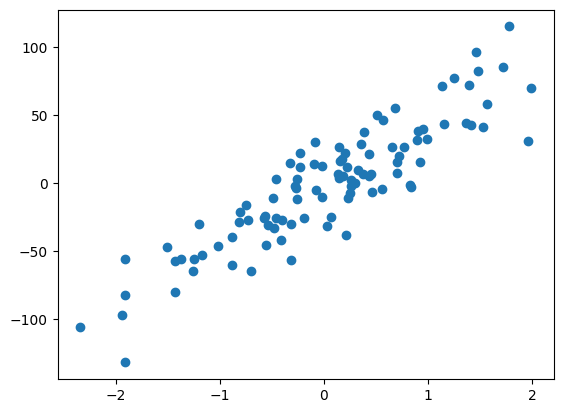

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
slope = reg.coef_

In [ ]:
reg.intercept_

np.float64(-2.6234289775670234)

In [ ]:
print(slope)

[42.41364829]


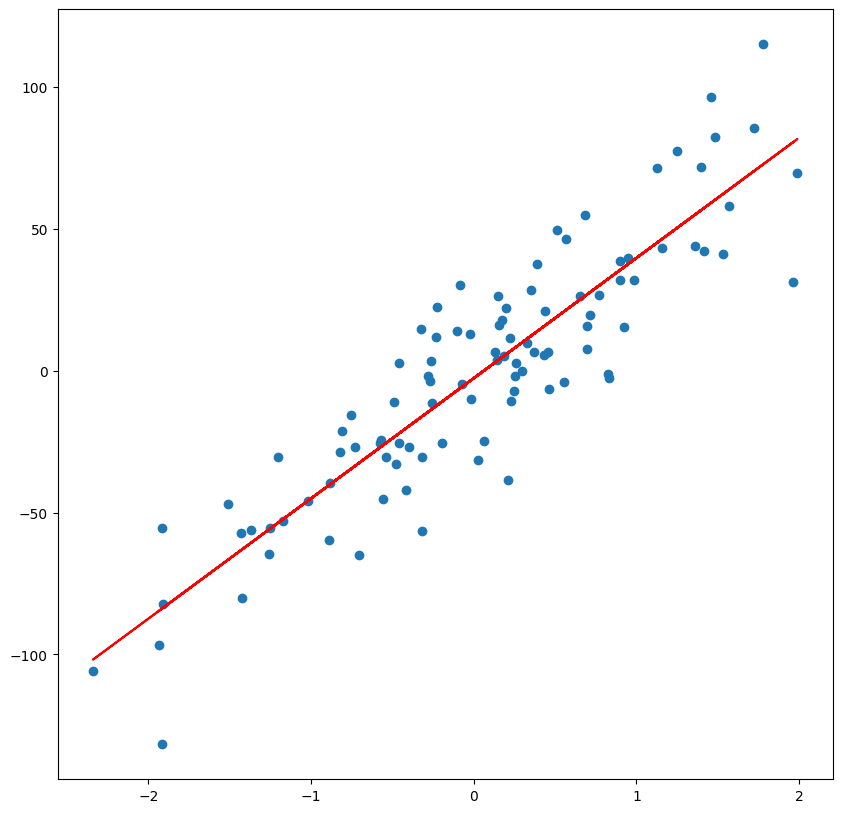

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')
plt.show()

In [ ]:
class GDRegression:
  def __init__(self,learning_rate,epochs,slope):
    self.m= slope
    self.lr = learning_rate
    self.epochs = epochs
    self.b=0

  def fit(self,x,y):
    #calculate the b using gradient descent
    for i in range(self.epochs):
      loss_slope = -2*np.sum(y-self.m*x-self.b)
      self.b=self.b-(self.lr*loss_slope)
    print(self.b)

In [ ]:
#we make a object of our class GDRegression and check that the value of b is equal to b= -2.6234289775670234 or not

gd= GDRegression(0.01,100,slope)

In [ ]:
gd.fit(x,y)

2.0145449043364236e+230


In [2]:
import numpy as np
import plotly.graph_objects as go

# --- 1. Generate sample linear data ---
# Same as before: data that follows y = 2x + 5, plus some noise.
X = 2 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)

# --- 2. Define the Loss Function (Mean Squared Error) ---
def calculate_loss(m, b, X, y):
    """Calculates the Mean Squared Error for a given m and b."""
    n_samples = len(X)
    y_predicted = m * X + b
    error = y_predicted - y
    loss = (1/n_samples) * np.sum(error**2)
    return loss

# --- 3. Create a grid of m and b values for the 3D plot ---
m_vals = np.linspace(-10, 15, 50)
b_vals = np.linspace(-10, 15, 50)
M, B = np.meshgrid(m_vals, b_vals)
losses = np.array([calculate_loss(m, b, X, y) for m, b in zip(np.ravel(M), np.ravel(B))])
Z = losses.reshape(M.shape)

# --- 4. Gradient Descent Algorithm ---
def gradient_descent(X, y, m_start, b_start, learning_rate, epochs):
    """Performs gradient descent to find the best m and b."""
    m, b = m_start, b_start
    path = [] # To store the (m, b, loss) path for visualization
    n_samples = float(len(X))

    for i in range(epochs):
        loss = calculate_loss(m, b, X, y)
        path.append((m, b, loss))
        y_predicted = m * X + b
        dm = (2/n_samples) * np.sum(X * (y_predicted - y))
        db = (2/n_samples) * np.sum(y_predicted - y)
        m = m - learning_rate * dm
        b = b - learning_rate * db

    return np.array(path)

# --- 5. Run the visualization ---
# Hyperparameters
learning_rate = 0.05
epochs = 150

# Three random starting points
start_points = [
    {'m': -8, 'b': 10, 'color': 'red'},
    {'m': 12, 'b': 12, 'color': 'lime'}, # Changed to lime for better visibility
    {'m': 10, 'b': -5, 'color': 'cyan'}
]

# Create a list to hold all our graph objects
data_to_plot = []

# Add the main surface plot
surface = go.Surface(
    x=M, y=B, z=Z,
    colorscale='viridis',
    opacity=0.7,
    showscale=False,
    name='Loss Surface'
)
data_to_plot.append(surface)

# Run gradient descent for each starting point and add its path to the plot
for point in start_points:
    m_start, b_start = point['m'], point['b']

    # Run gradient descent to get the path
    path = gradient_descent(X, y, m_start, b_start, learning_rate, epochs)

    # Add the path as a 3D line with markers
    path_trace = go.Scatter3d(
        x=path[:, 0], y=path[:, 1], z=path[:, 2],
        mode='lines+markers',
        line=dict(color=point['color'], width=5),
        marker=dict(size=3, color=point['color']),
        name=f'Path from ({m_start}, {b_start})'
    )
    data_to_plot.append(path_trace)

# Create the figure object
fig = go.Figure(data=data_to_plot)

# Update layout for better appearance and labels
fig.update_layout(
    title='Interactive Gradient Descent Visualization',
    scene=dict(
        xaxis_title='m (slope)',
        yaxis_title='b (intercept)',
        zaxis_title='Loss (MSE)',
        aspectratio=dict(x=1, y=1, z=0.7) # Adjust aspect ratio
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()